In [26]:
import resources.Get_Data as Get_Data
from resources.single_data.RF_AR import RF_AR
from resources.single_data.CART_AR import CART_AR
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

analiza_statystyczna_szeregu
---------------------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------------------
--                                                            SPRAWDZENIE STACJONARNOŚCI                                                         --
--                                                                  DANE PODSTAWOWE                                                                --
---------------------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------------------
|   Constant only   |   Statystyka ADF: -8.518  |  Wartość krytyczna dla 5%: -2.8

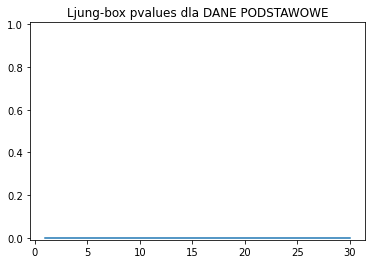

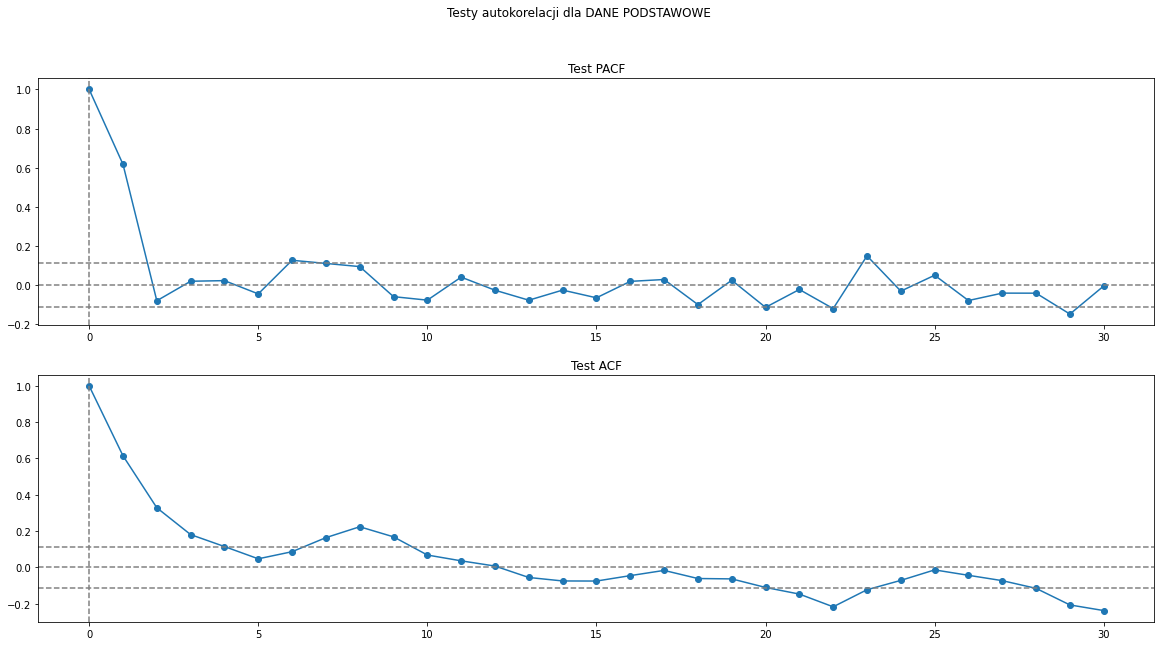

In [27]:
getter = Get_Data.Get_Data("^IXIC", "2022-02-15", "1h")#.make_norm_diff()
#szereg = Get_Data.Get_Data("^IXIC", start="2021-09-20", end='2022-02-20', interval="1d").make_diff()
szereg = pd.read_csv("sim.csv")['x'][:300]
getter.analiza_statystyczna_szeregu(szereg_pandas=szereg)

In [28]:
cart_ar = CART_AR(data=szereg, params={"lags": 1}, test_ratio=0.9)
opt = cart_ar.cross_validation_rolling_window(dlugosc_okna=1/5, max_depth=10)

cart_ar.fit(params_fit={"max_depth": opt})

Current depth:  1
Current depth:  2
Current depth:  3
Current depth:  4
Current depth:  5
Current depth:  6
Current depth:  7
Current depth:  8
Current depth:  9
OPTYMALNA WARTOŚĆ PARAMETRU MAX_DEPTH:  9
{'max_depth': 9}
fit


forecast_raw


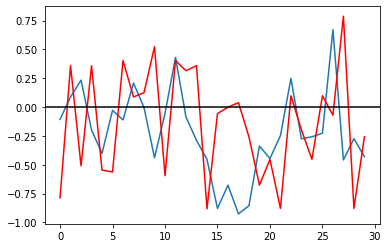

<Figure size 1440x720 with 0 Axes>

analiza_statystyczna_szeregu
---------------------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------------------
--                                                            SPRAWDZENIE STACJONARNOŚCI                                                         --
--                                                                  reszty                                                                --
---------------------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------------------
|   Constant only   |   Statystyka ADF: -7.157  |  Wartość krytyczna dla 5%: -2.968  |  pv

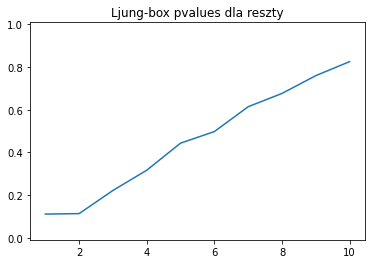

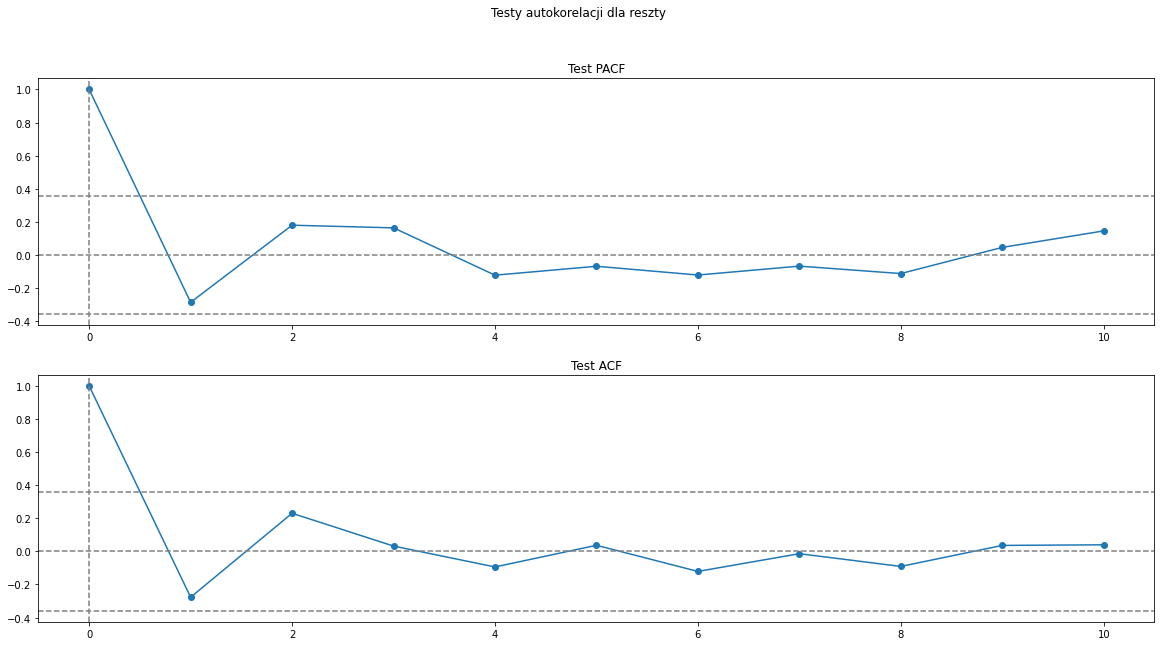

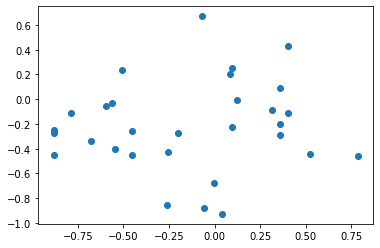

In [29]:
forecasts = cart_ar.forecast_raw()

plt.plot(cart_ar.data_test.values[:50])
plt.plot(forecasts[:50], c='r')
plt.axhline(0, c='black')
plt.figure(figsize=(20,10))
plt.show()

getter.analiza_statystyczna_szeregu(cart_ar.errors, co_sprawdzamy="reszty", wykres=True, max_lag=10)
plt.scatter(forecasts, cart_ar.data_test)

PEARSON'S CORRELATION:  0.0954755098251141


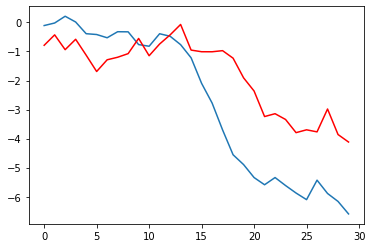

In [30]:
forfor = np.cumsum(forecasts)
foredfor = np.cumsum(cart_ar.data_test.values)
plt.plot(foredfor)
plt.plot(forfor, c="r")

print("PEARSON'S CORRELATION: ", np.corrcoef(forecasts, cart_ar.data_test)[0, 1])